In [1]:
import json
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import ast

In [2]:
with open('sddip_runtime.json', 'r') as runtime_file:
    runtime_data = runtime_file.read()

runtimes_dict = json.loads(runtime_data)
runtimes_dict


{'binary_approximation_refinement_i1': 0.0,
 'sampling_i1': 0.0,
 'forward_pass_i1': 0.31212615966796875,
 'upper_bound_i1': 0.0,
 'backward_pass_i1': 0.854686975479126,
 'lower_bound_i1': 0.015623331069946289,
 'binary_approximation_refinement_i2': 0.0,
 'sampling_i2': 0.0,
 'forward_pass_i2': 0.45648860931396484,
 'upper_bound_i2': 0.0,
 'backward_pass_i2': 1.4471070766448975,
 'lower_bound_i2': 0.015611648559570312,
 'binary_approximation_refinement_i3': 0.0,
 'sampling_i3': 0.0,
 'forward_pass_i3': 0.40425586700439453,
 'upper_bound_i3': 0.015625953674316406,
 'backward_pass_i3': 1.517730712890625,
 'lower_bound_i3': 0.0070362091064453125,
 'binary_approximation_refinement_i4': 0.0,
 'sampling_i4': 0.0,
 'forward_pass_i4': 0.4248940944671631,
 'upper_bound_i4': 0.0,
 'backward_pass_i4': 1.499011516571045,
 'lower_bound_i4': 0.0,
 'binary_approximation_refinement_i5': 0.0,
 'sampling_i5': 0.0,
 'forward_pass_i5': 0.44586682319641113,
 'upper_bound_i5': 0.0,
 'backward_pass_i5': 1.55

In [3]:
backward_pass_durations = [value for key, value in runtimes_dict.items() if 'backward_pass' in key.lower()]
backward_pass_durations

[0.854686975479126,
 1.4471070766448975,
 1.517730712890625,
 1.499011516571045,
 1.5596296787261963,
 1.605783462524414,
 1.6903059482574463,
 1.6896741390228271,
 1.727708339691162,
 1.7930045127868652,
 1.8604059219360352,
 1.9089281558990479,
 1.9420583248138428,
 2.0089950561523438,
 2.015547037124634,
 382.64524936676025,
 9.409682035446167,
 612.924459695816,
 16.263221263885498,
 16.278744220733643,
 653.7543721199036,
 23.2258403301239,
 1757.8287556171417,
 31.79347515106201,
 897.4944796562195,
 38.422337770462036,
 2710.830461502075,
 44.357605934143066,
 3545.395891904831]

In [4]:
iterations = [i+1 for i in range(len(backward_pass_durations))]

In [5]:
iteration_durations = []
for i in iterations:
    iteration_durations.append([value for key, value in runtimes_dict.items() if f"i{i}" == key.split("_")[-1]])

iteration_durations = [sum(durations) for durations in iteration_durations]
iteration_durations

[1.182436466217041,
 1.9192073345184326,
 1.9446487426757812,
 1.923905611038208,
 2.0199501514434814,
 2.0642120838165283,
 2.192962169647217,
 2.181948184967041,
 2.237200975418091,
 2.3237292766571045,
 2.408233165740967,
 2.4571821689605713,
 2.50858736038208,
 2.59617280960083,
 2.599353790283203,
 382.8916811943054,
 11.763181447982788,
 613.8157863616943,
 20.376224994659424,
 20.52074432373047,
 655.2780277729034,
 29.179709911346436,
 1760.0417666435242,
 40.10654926300049,
 900.5188565254211,
 48.552043199539185,
 2714.5821120738983,
 56.63093590736389,
 3549.9575481414795]

In [6]:
residual_iteration_duration = [id-bwd for id,bwd in zip(iteration_durations, backward_pass_durations)]
residual_iteration_duration

[0.32774949073791504,
 0.47210025787353516,
 0.42691802978515625,
 0.4248940944671631,
 0.46032047271728516,
 0.45842862129211426,
 0.5026562213897705,
 0.49227404594421387,
 0.5094926357269287,
 0.5307247638702393,
 0.5478272438049316,
 0.5482540130615234,
 0.5665290355682373,
 0.5871777534484863,
 0.5838067531585693,
 0.24643182754516602,
 2.353499412536621,
 0.8913266658782959,
 4.113003730773926,
 4.242000102996826,
 1.523655652999878,
 5.953869581222534,
 2.2130110263824463,
 8.313074111938477,
 3.02437686920166,
 10.129705429077148,
 3.75165057182312,
 12.273329973220825,
 4.56165623664856]

In [7]:
relative_backward_pass_duration = np.divide(np.array(backward_pass_durations),np.array(iteration_durations))
relative_backward_pass_duration = relative_backward_pass_duration.tolist()
relative_backward_pass_duration

[0.7228185191323799,
 0.7540128940826528,
 0.7804652221162938,
 0.7791502389569543,
 0.7721129541794215,
 0.7779159298183527,
 0.7707866426758136,
 0.7743878386591247,
 0.7722633588465542,
 0.7716064563967904,
 0.7725190186738518,
 0.7768769365221937,
 0.7741641194102366,
 0.7738294803500516,
 0.7754031192902899,
 0.9993563928399372,
 0.7999266250423935,
 0.9985478922411535,
 0.7981469221186978,
 0.7932823470690915,
 0.997674795142791,
 0.7959585753487086,
 0.9987426372099096,
 0.7927252714407036,
 0.9966415174459856,
 0.7913639723163434,
 0.9986179638644429,
 0.7832751697182372,
 0.9987150110459668]

In [8]:
dual_solver_df = pd.read_csv(f"dual_solver.csv", sep="\t")
dual_solver_df["solver_time"]=dual_solver_df.solver_time.apply(lambda x: ast.literal_eval(str(x)))

dual_solver_iterations = dual_solver_df.i.unique().tolist()
#lagrange_markers = [x-1 for x in dual_solver_iterations]    

In [9]:
dual_solver_df

,i,k,t,iterations,solver_time
0,16,0,11,"[81, 80, 80]","[0.23341941833496094, 0.2140040397644043, 0.14..."
1,16,0,10,"[73, 73, 73]","[0.207106351852417, 0.23726296424865723, 0.248..."
2,16,0,9,"[75, 73, 73]","[0.6441681385040283, 0.647986650466919, 0.2503..."
3,16,0,8,"[241, 252, 160]","[2.4599201679229736, 2.3484463691711426, 1.717..."
4,16,0,7,"[213, 214, 214]","[2.3653464317321777, 2.407984495162964, 2.4793..."
...,...,...,...,...,...
72,29,0,5,"[1260, 1226, 1261]","[150.96285390853882, 133.49545669555664, 154.4..."
73,29,0,4,"[1253, 177, 1331]","[138.2799346446991, 16.41774821281433, 144.345..."
74,29,0,3,"[565, 3544, 212]","[57.686047077178955, 448.69753408432007, 24.69..."
75,29,0,2,"[1348, 206, 214]","[208.38351678848267, 31.8872811794281, 27.9943..."


In [10]:
dual_solver_time_all_iterations = []

for i in iterations:
    duration = 0
    if i in dual_solver_iterations:
        solver_times = dual_solver_df.loc[dual_solver_df["i"] == i].solver_time.values.tolist()
        duration = np.sum(solver_times)
    dual_solver_time_all_iterations.append(duration)
    
dual_solver_time_all_iterations
dual_solver_time_per_iteration = [i for i in dual_solver_time_all_iterations if i != 0]

In [11]:
residual_backward_pass_duration = [bwd-dsd for bwd, dsd in zip(backward_pass_durations, dual_solver_time_all_iterations)]
residual_backward_pass_duration

[0.854686975479126,
 1.4471070766448975,
 1.517730712890625,
 1.499011516571045,
 1.5596296787261963,
 1.605783462524414,
 1.6903059482574463,
 1.6896741390228271,
 1.727708339691162,
 1.7930045127868652,
 1.8604059219360352,
 1.9089281558990479,
 1.9420583248138428,
 2.0089950561523438,
 2.015547037124634,
 112.93957042694092,
 9.409682035446167,
 63.776323080062866,
 16.263221263885498,
 16.278744220733643,
 44.50744676589966,
 23.2258403301239,
 96.39774870872498,
 31.79347515106201,
 45.08985352516174,
 38.422337770462036,
 93.23837304115295,
 44.357605934143066,
 120.14092659950256]

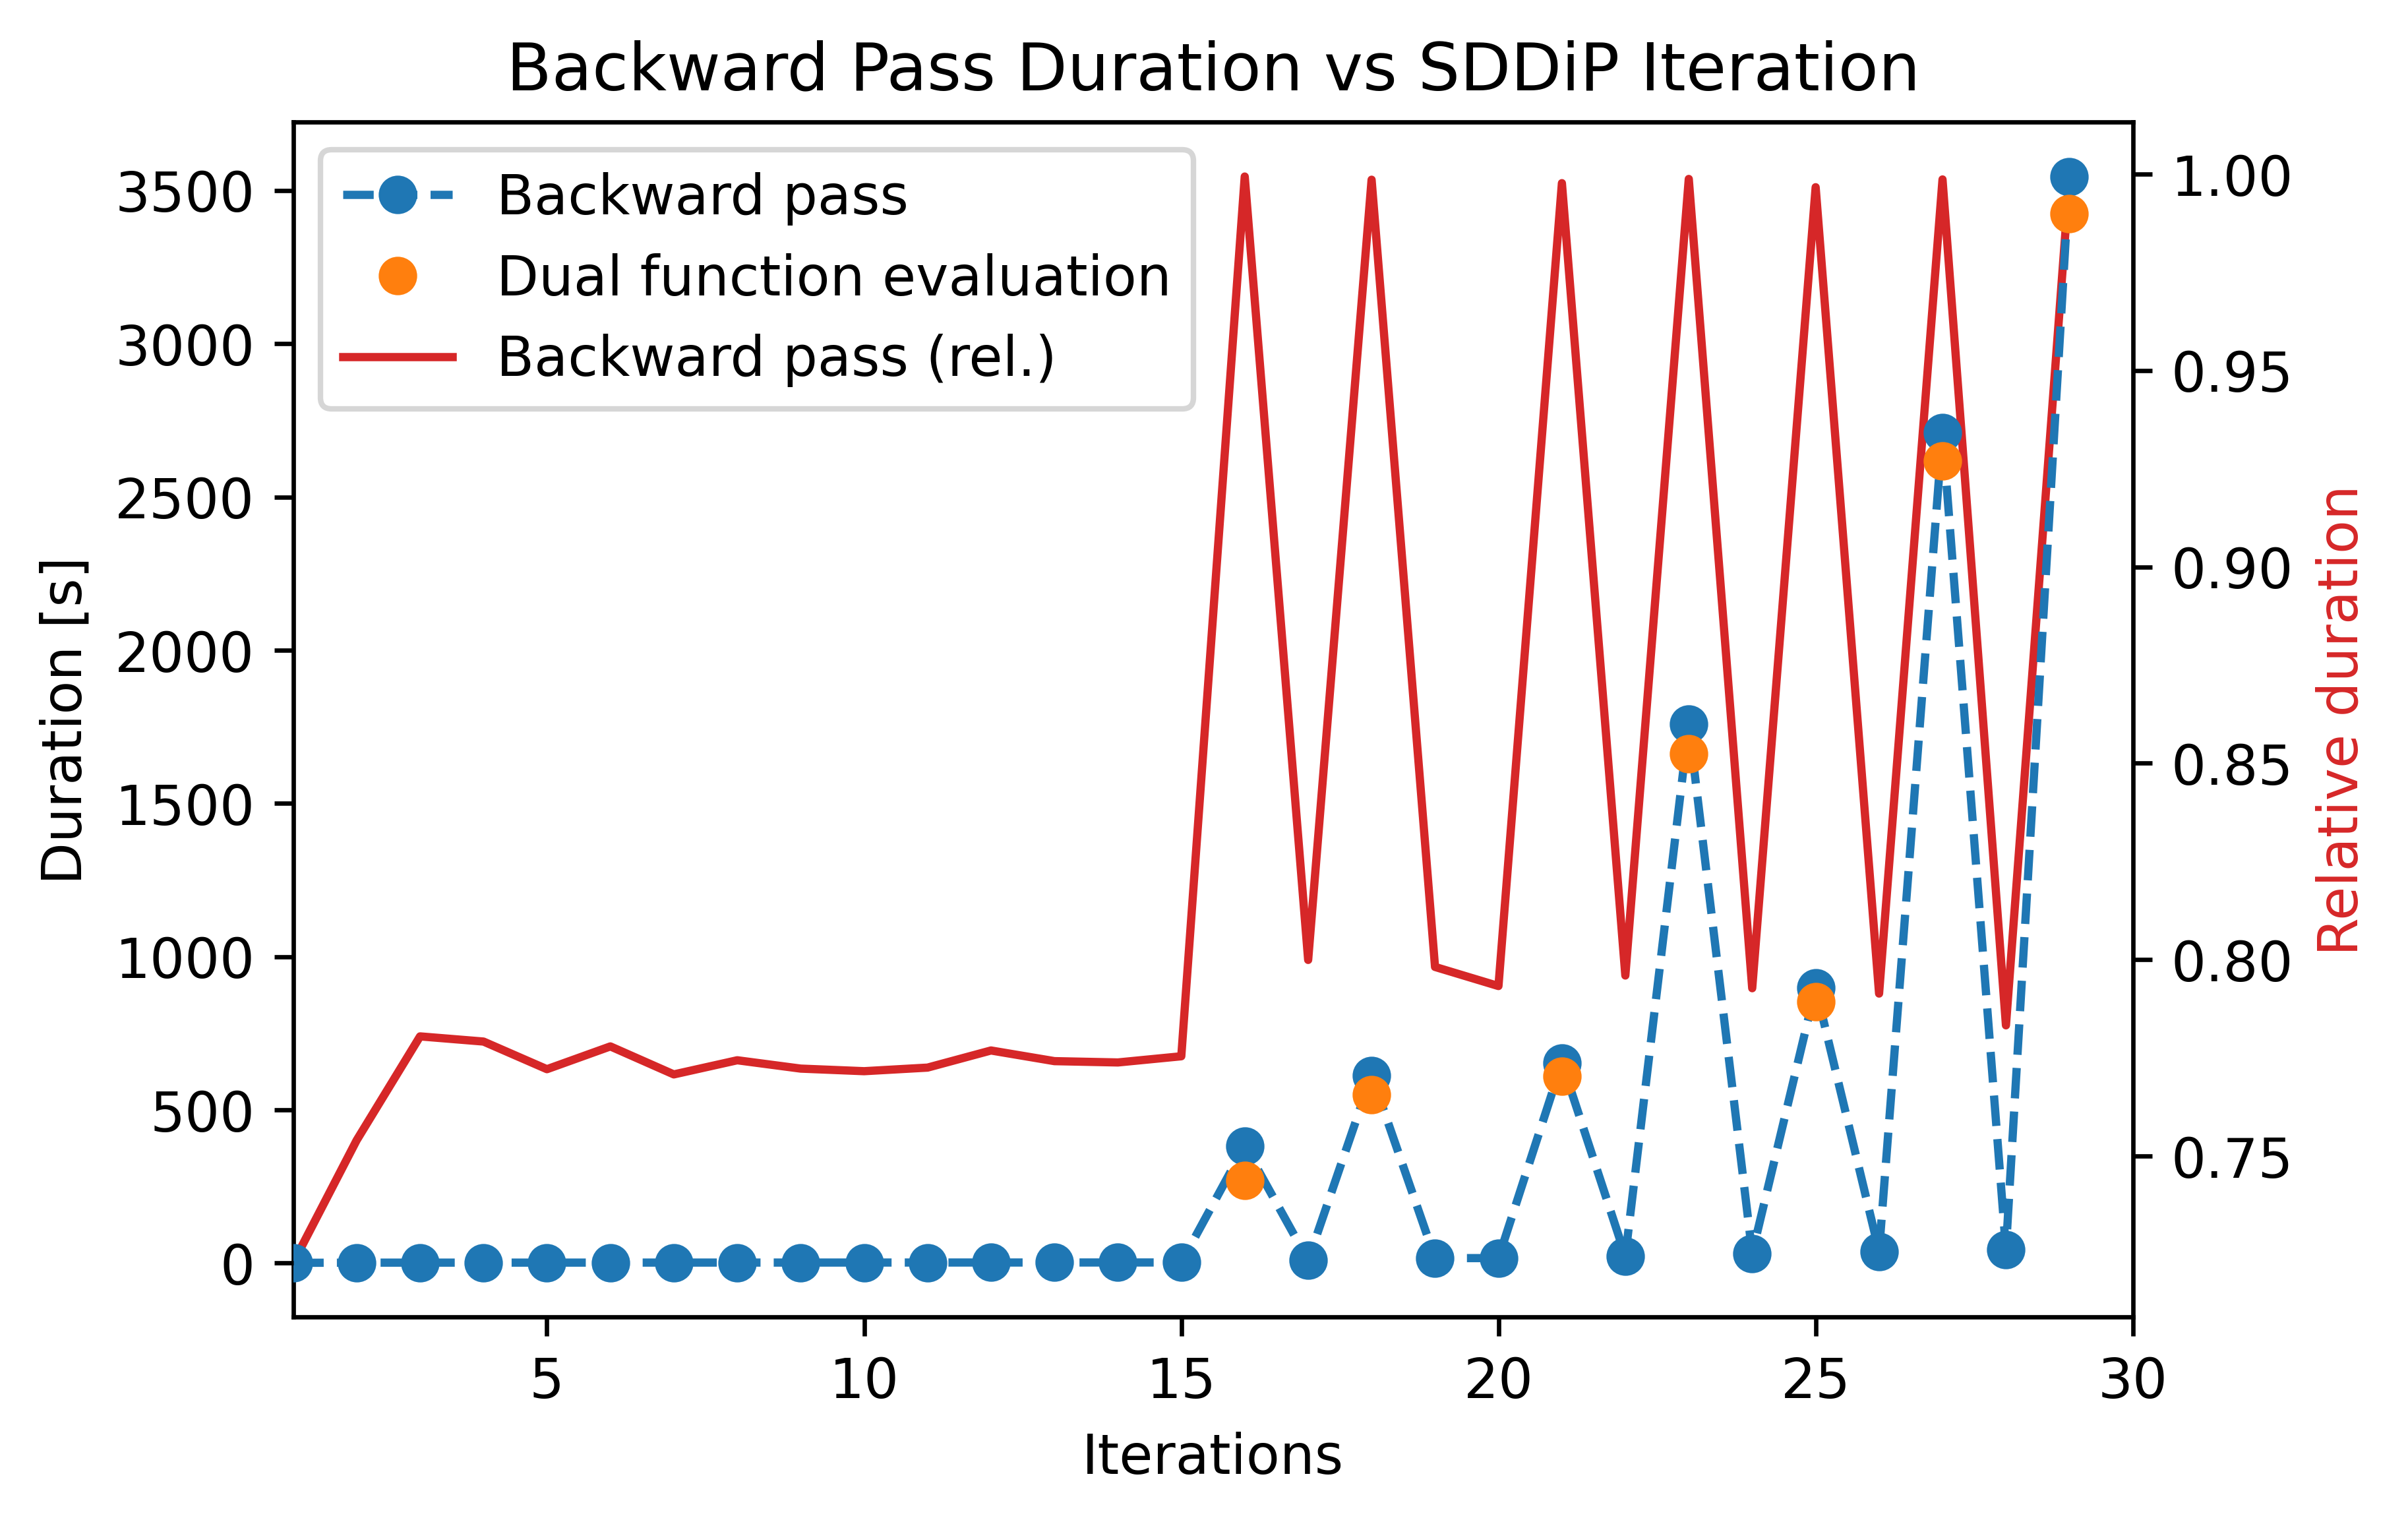

In [12]:
fig = plt.figure(dpi= 600, facecolor='w', edgecolor='k')
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_zorder(1)
ax1.set_frame_on(False)
ax2.set_zorder(0)

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Duration [s]')
ax2.set_ylabel('Relative duration', color='C3')

lns1, = ax1.plot(iterations, backward_pass_durations, "--o", label="Backward pass", zorder=1)
lns2, = ax1.plot(dual_solver_iterations, dual_solver_time_per_iteration, "o", label="Dual function evaluation", zorder=2, color="C1")
lns3, = ax2.plot(iterations, relative_backward_pass_duration, color="C3", ls="-", zorder=0, label="Backward pass (rel.)")

#facecolors='none', edgecolors='C1',
#ax1.plot(iterations, backward_pass_durations, "o", ls="-", markevery=lagrange_markers)
#ax1.plot(iterations, dual_solver_time_per_iteration, "o", markevery=lagrange_markers)
lns = [lns1,lns2,lns3]
labs = [l.get_label() for l in lns]

ax1.legend(lns, labs, loc=0)
plt.xlim([1, 30])
plt.title("Backward Pass Duration vs SDDiP Iteration")
#plt.legend()
plt.show()